## Property Price Prediction

The solution is divided into the following sections: 
- Data understanding and Cleaning
- Data Exploration
- Data Preparation
- Model building and evaluation
- Regularization


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

### 1. Data Understanding and Cleaning

Let's first have a look at the dataset and understand the size, attribute names etc.

In [2]:
# Reading Dataset
Property = pd.read_csv('train.csv')

In [3]:
# Displaying first five rows
Property.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape of dataframe
Property.shape

(1460, 81)

In [5]:
# Observing type and count of data
Property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Clearly we can see that there are missing values in the dataframe, this we will deal with in Data Cleaning

Also there are columns which are Categorical in nature but are present as Int or Float in Dataset

*Listing all the numerical features in the dataset*

In [6]:
num_var = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
           'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
           'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch',
           'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [7]:
# All columns in dataset
Property.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Looking how many categorical variables are there
print(len(Property.columns))
print(len(num_var))

81
34


*There are 47 categorical columns*,let's get them in `cat_var`

In [9]:
cat_var = [col for col in Property.columns if col not in num_var]
len(cat_var)

47

Now that we have our features in separate lists , we can now move ahead with Cleaning part

### Data Cleaning

Let's check correlation before dropping or imputing values

In [10]:
df_num = Property[num_var]
corl = df_num.corr()
corl

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


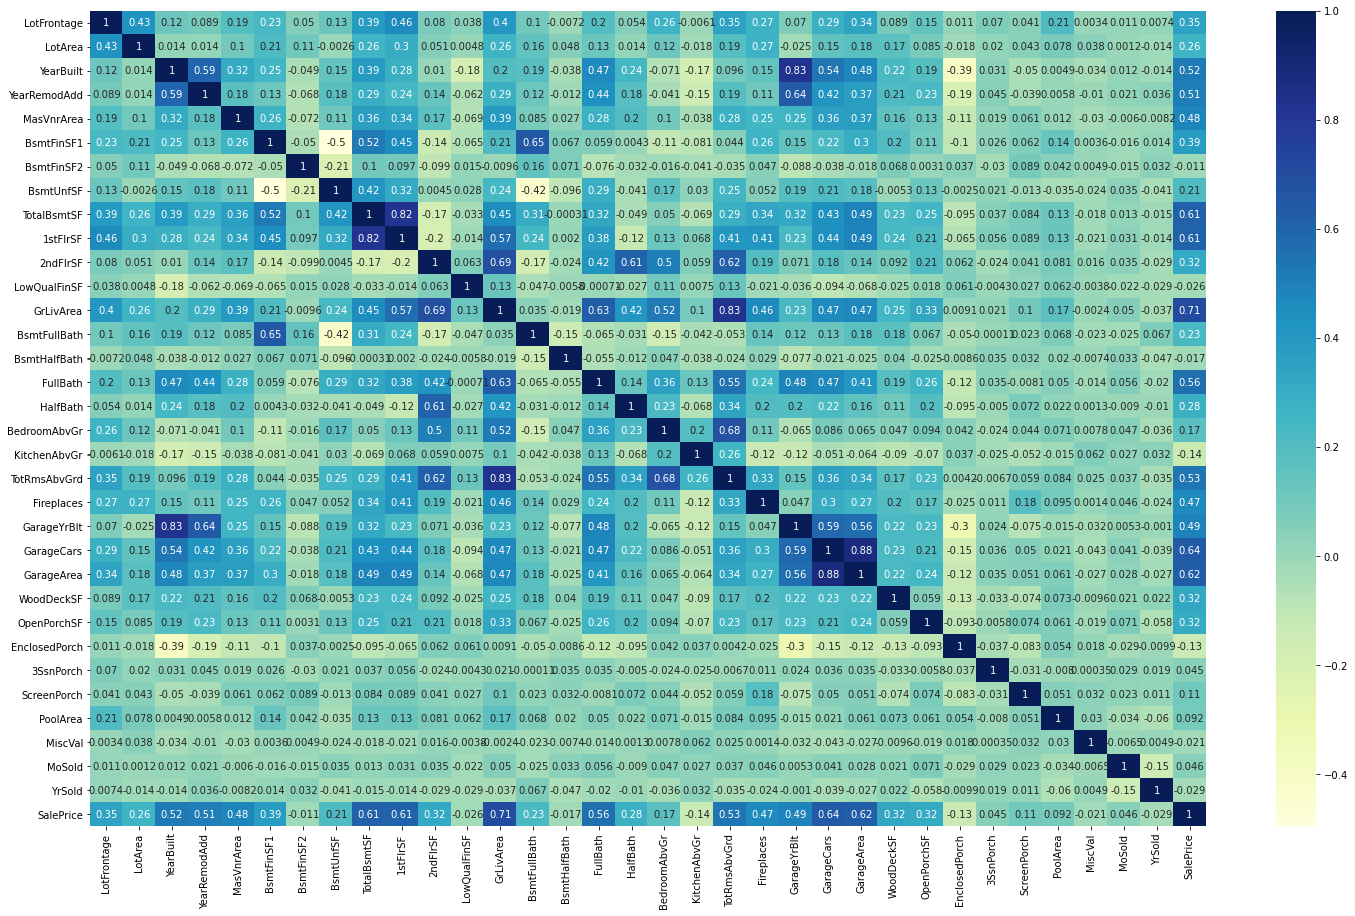

In [11]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sb.heatmap(corl, cmap="YlGnBu", annot=True)
plt.show()

In [12]:
# DIsplaying % of missing data 
(round(Property.isnull().mean(),2)*100)

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           3.0
BsmtCond           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtFinType2       3.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF   

In [13]:
# Dropping Columns having null values greater than 40%
for col in Property.columns:
    if Property[''+col+''].isnull().mean() > 0.4:
        Property.drop(col,axis =1,inplace=True)
len(Property.columns)

76

There are few columns which shows same % value , let's try dropping duplicates

In [14]:
# Dropping Duplicates
Property.drop_duplicates(inplace = True)
Property.shape

(1460, 76)

In [15]:
Property[num_var].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As the *Mean* & *Median* are close to each other we can replace the missing values by *Median* as there are outliers.

In [16]:
# Imputing numeric variable
Property['LotFrontage'].fillna(Property['LotFrontage'].median(), inplace=True)
Property['MasVnrArea'].fillna(Property['MasVnrArea'].median(), inplace=True)
Property['GarageYrBlt'].fillna(Property['GarageYrBlt'].median(), inplace=True)

Dropping rows of remainig columns as the % is low

In [17]:
# Dropping na values
Property.dropna(inplace=True)

In [18]:
Property.shape

(1338, 76)

In [19]:
# DIsplaying % of missing data 
(round(Property.isnull().mean(),2)*100)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

<AxesSubplot:>

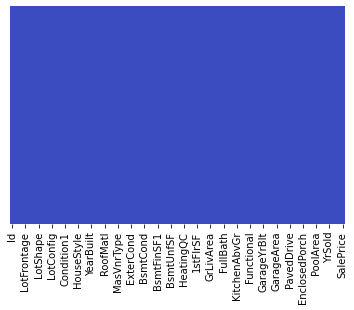

In [20]:
# Checking through heatmap
sb.heatmap(Property.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [21]:
# Dropping `ID ` column 
Property.drop('Id', axis=1, inplace=True)
Property.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
# Updating num_var
num_var = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
           'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
           'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch',
           'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [23]:
# Updating cat_var 
cat_var = [col for col in Property.columns if col not in num_var]
print(len(cat_var))
print(len(num_var))
print(len(Property.columns))

41
34
75


In [24]:
Property.shape

(1338, 75)

Data Cleaning is done now , let's move on to the next step i.e *Data Exploration*

### 2. Data Exploration

Let's see the correlation between numeric variables 

In [25]:
df_num = Property[num_var]
corl = df_num.corr()
corl

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.297748,0.101577,0.078086,0.176002,0.219077,0.039043,0.105480,0.378261,0.410111,0.067485,0.010776,0.362521,0.101836,-0.001471,0.172522,0.037239,0.246173,0.008584,0.321281,0.226925,0.063547,0.268944,0.332965,0.068108,0.143339,0.015528,0.064049,0.031865,0.185851,-0.002243,0.013575,0.011157,0.327835
LotArea,0.297748,1.000000,-0.005022,0.001681,0.096727,0.210148,0.110493,-0.014589,0.267188,0.288502,0.047773,0.009729,0.255445,0.160687,0.046420,0.115727,0.006052,0.120369,-0.012611,0.185654,0.263061,-0.025700,0.138228,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757
YearBuilt,0.101577,-0.005022,1.000000,0.617156,0.299410,0.224264,-0.070403,0.147762,0.385146,0.263585,0.006989,-0.160289,0.189146,0.175108,-0.055204,0.486777,0.227626,-0.080644,-0.176124,0.099415,0.110807,0.825172,0.524076,0.443854,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.004396,-0.007898,0.504297
YearRemodAdd,0.078086,0.001681,0.617156,1.000000,0.168311,0.099681,-0.085268,0.171881,0.264281,0.241889,0.120545,-0.064395,0.276580,0.099294,-0.023966,0.460120,0.169456,-0.074393,-0.154147,0.174660,0.089952,0.641585,0.459449,0.386213,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.014552,0.034503,0.501435
MasVnrArea,0.176002,0.096727,0.299410,0.168311,1.000000,0.253015,-0.083303,0.104662,0.365629,0.341001,0.169730,-0.061707,0.392006,0.078875,0.015804,0.272271,0.193268,0.108829,-0.007299,0.289758,0.229365,0.249750,0.363916,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811
BsmtFinSF1,0.219077,0.210148,0.224264,0.099681,0.253015,1.000000,-0.064855,-0.552809,0.505000,0.450366,-0.151876,-0.051909,0.201974,0.638094,0.057227,0.045094,-0.025251,-0.119100,-0.035623,0.046284,0.245323,0.144611,0.197559,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677
BsmtFinSF2,0.039043,0.110493,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,-0.233449,0.083184,0.094065,-0.109254,0.007072,-0.021993,0.154980,0.072813,-0.090448,-0.038494,-0.008179,-0.028278,-0.042207,0.035643,-0.092595,-0.080264,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226
BsmtUnfSF,0.105480,-0.014589,0.147762,0.171881,0.104662,-0.552809,-0.233449,1.000000,0.363767,0.318097,-0.016117,-0.002384,0.222438,-0.463986,-0.105359,0.305802,-0.074157,0.154935,0.081795,0.242020,0.033157,0.180539,0.242278,0.195401,-0.020711,0.122171,-0.003372,0.023701,-0.023065,-0.039315,-0.018566,0.031202,-0.039076,0.191689
TotalBsmtSF,0.378261,0.267188,0.385146,0.264281,0.365629,0.505000,0.083184,0.363767,1.000000,0.893110,-0.234070,-0.058411,0.460778,0.282031,-0.019716,0.345685,-0.124788,0.029989,0.036844,0.297609,0.328103,0.321500,0.453427,0.511475,0.214364,0.255939,-0.104484,0.043142,0.068886,0.135654,-0.008679,0.000787,-0.001823,0.602042
1stFlrSF,0.410111,0.288502,0.263585,0.241889,0.341001,0.450366,0.094065,0.318097,0.893110,1.000000,-0.220279,-0.019860,0.554846,0.251597,-0.000064,0.367498,-0.146494,0.100643,0.059242,0.393786,0.401929,0.237928,0.440237,0.500071,0.233200,0.226615,-0.056003,0.053159,0.083054,0.134879,-0.014226,0.024109,-0.011258,0.604714


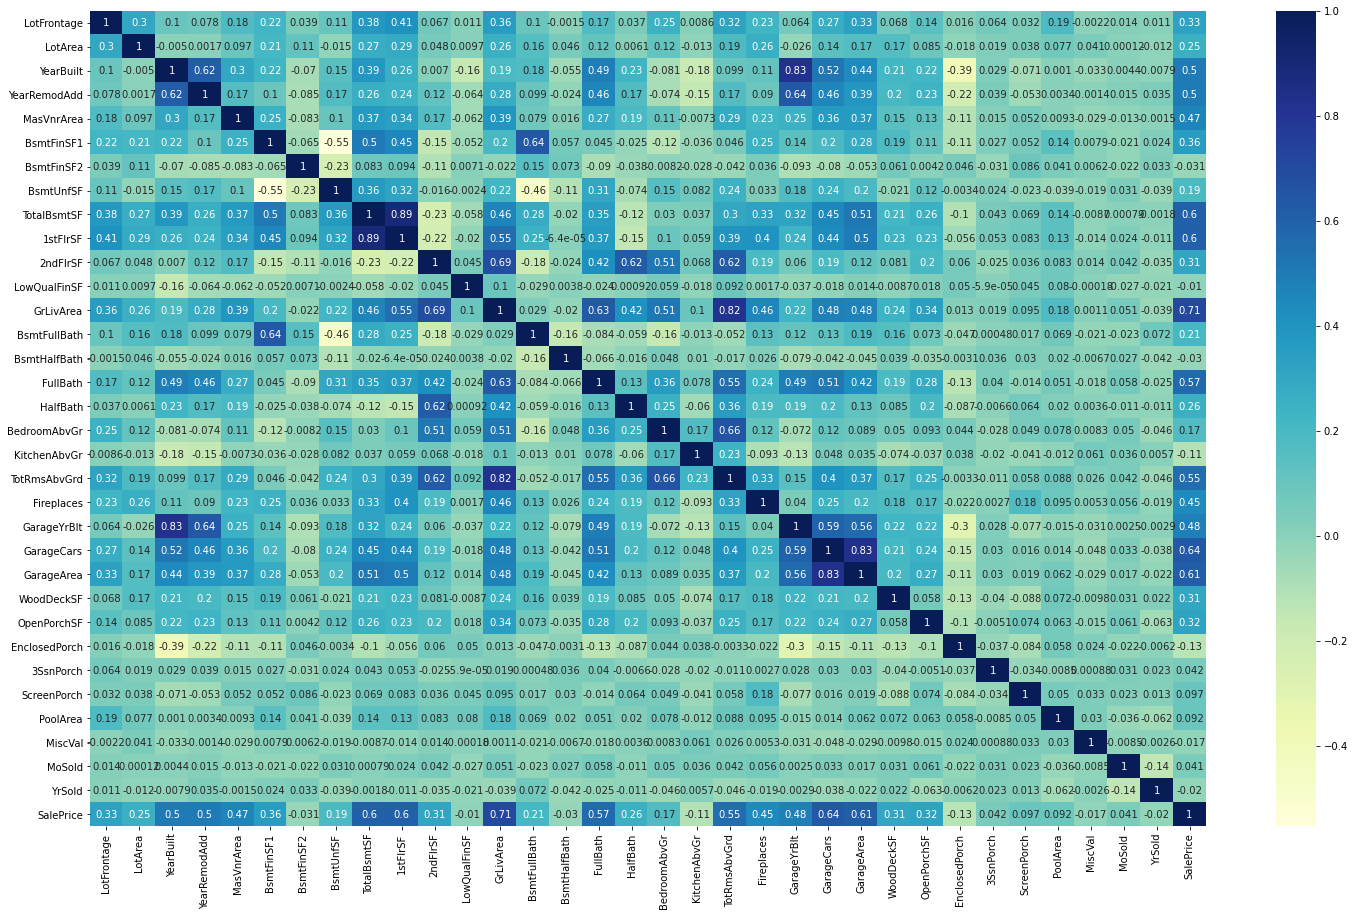

In [26]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sb.heatmap(corl, cmap="YlGnBu", annot=True)
plt.show()

The Heatmap shows some useful insights:

Correlation of `SalePrice` with independent features:
- It is highly correlated with GrlivArea,GarageCars,GarageArea,1stliSf etc
- It is negatively correlated with KitchenAbvAr, EnclosedPorch

Correlation between Independent features:
- There is high correlation between independent features GarageArea and GarageBbiltYr etc

We need to take care of Multicollinearity due to this while building model

*Plotting*  graphs for numerical variable vs the Dependent variable `SalesPrice`

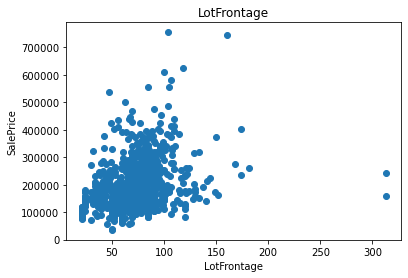

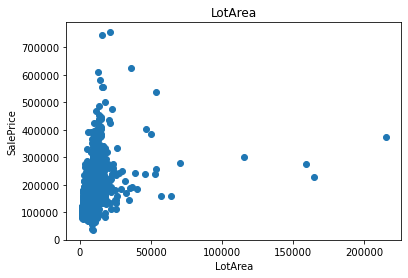

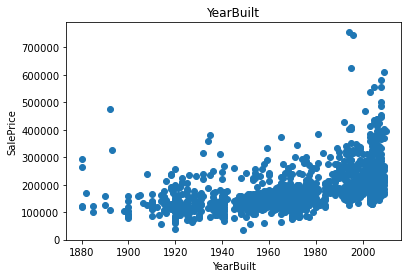

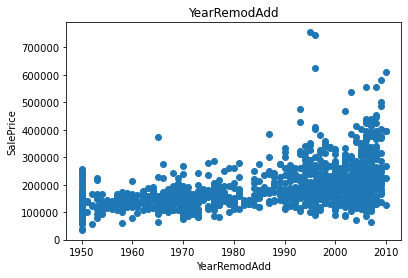

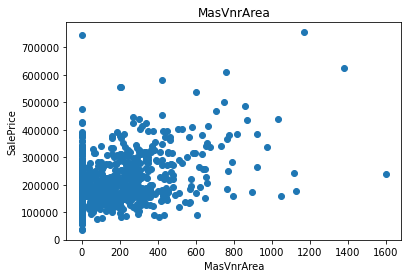

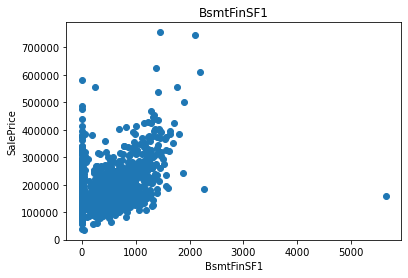

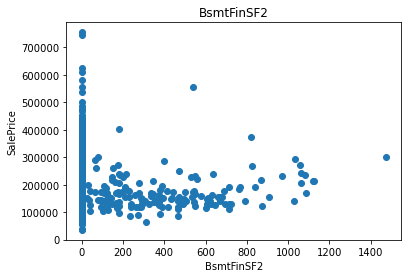

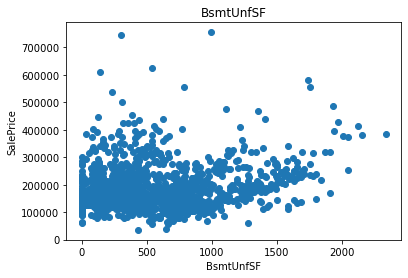

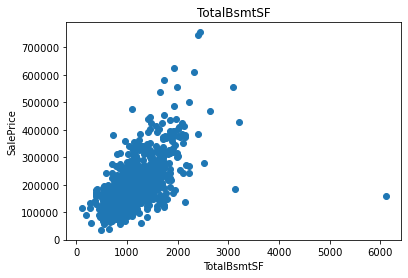

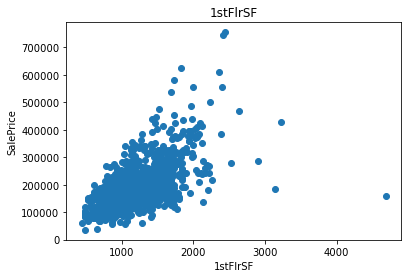

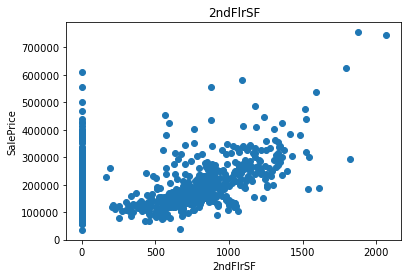

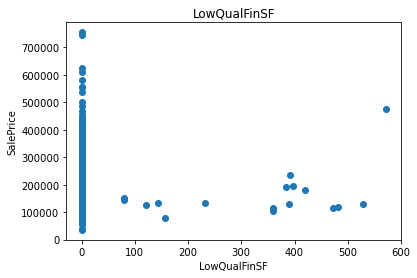

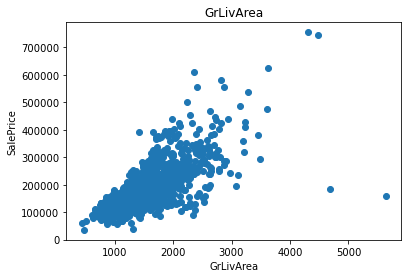

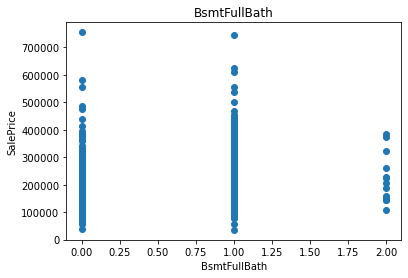

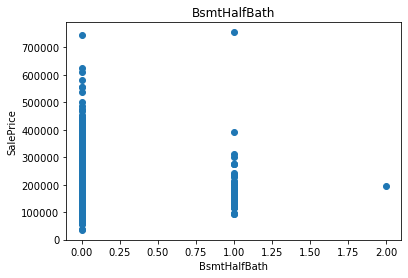

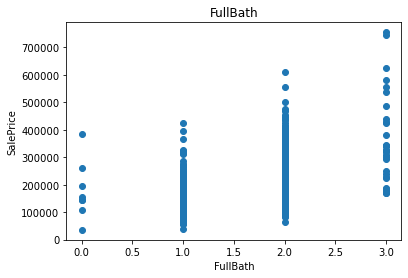

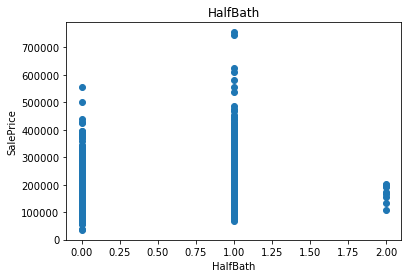

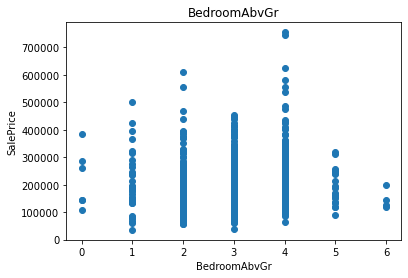

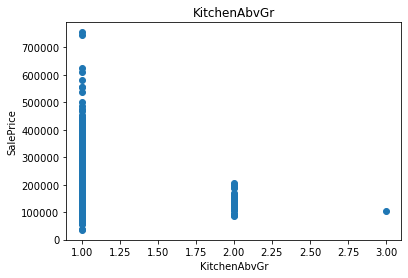

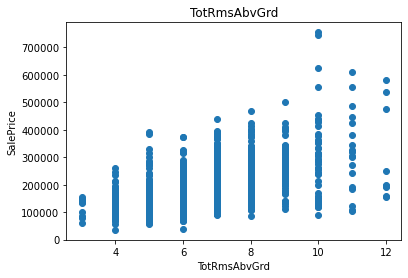

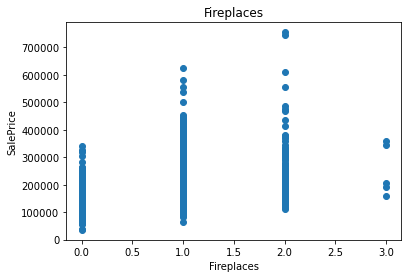

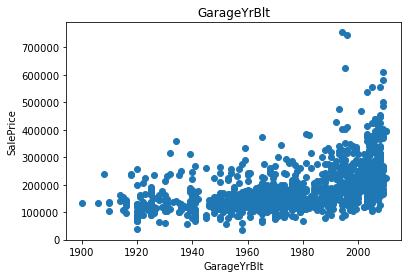

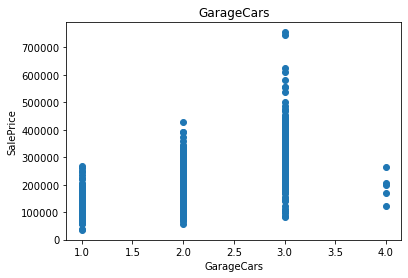

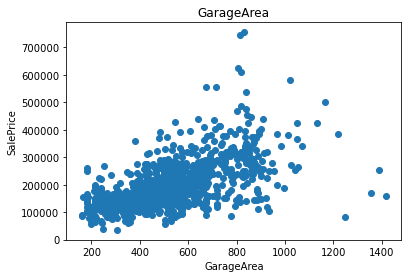

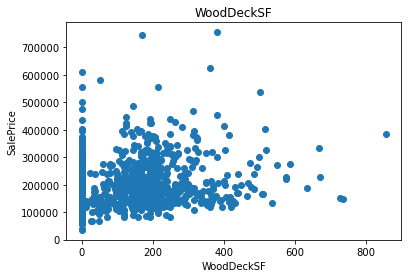

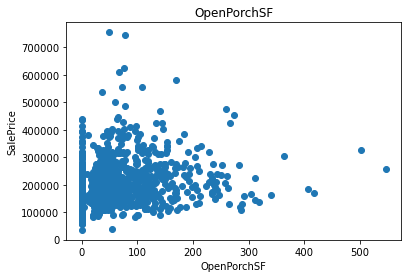

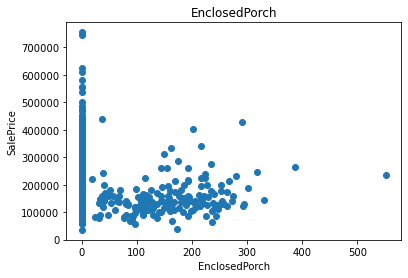

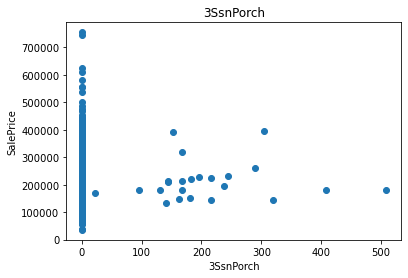

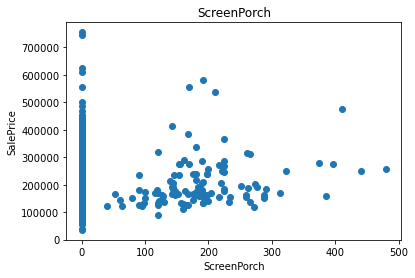

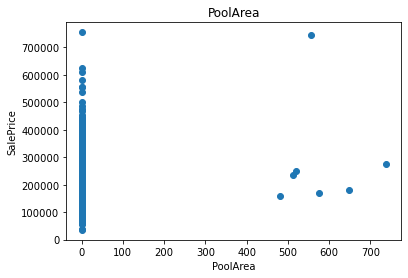

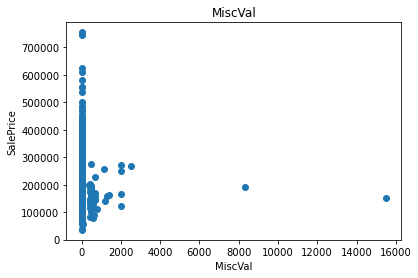

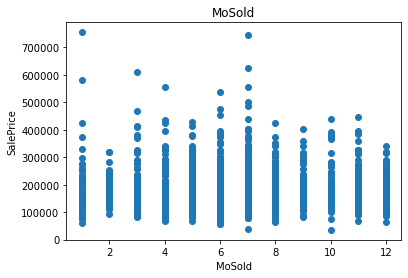

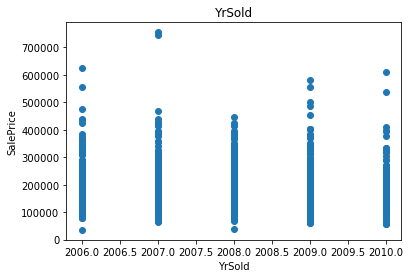

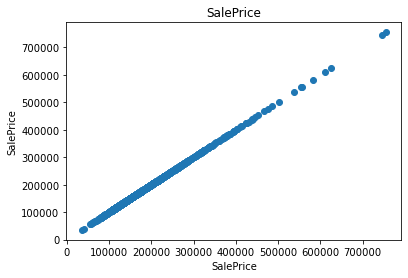

In [27]:
for col in num_var:
    plt.scatter((Property[col]), (Property['SalePrice']))
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

*Plotting* Categorical variables vs Dependent variable `SalePrice`

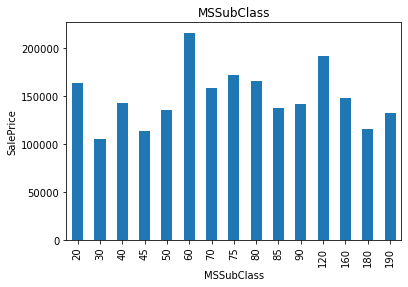

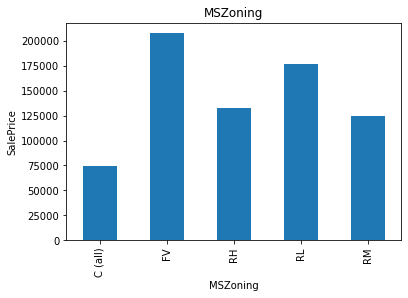

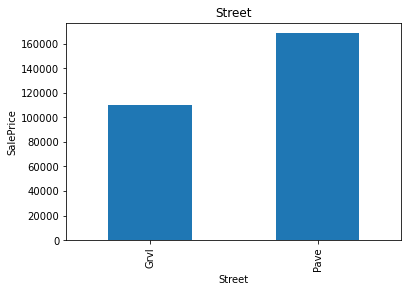

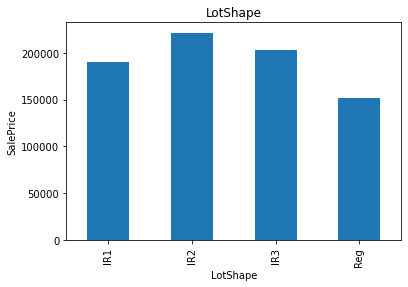

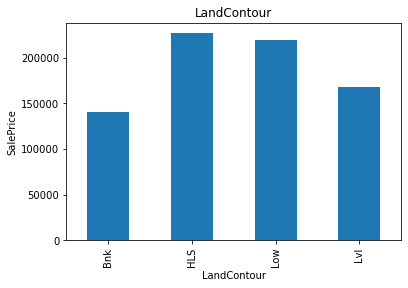

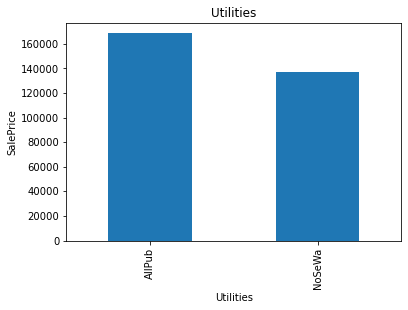

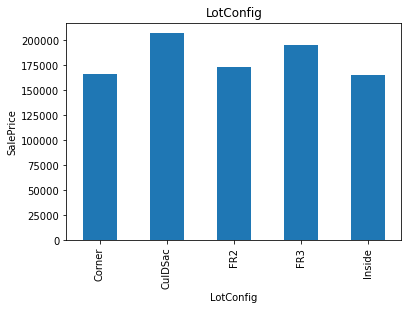

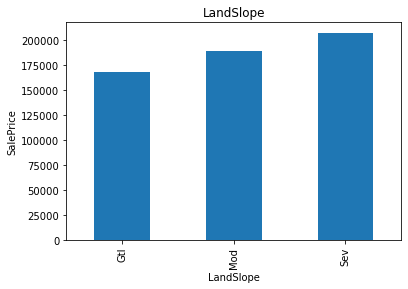

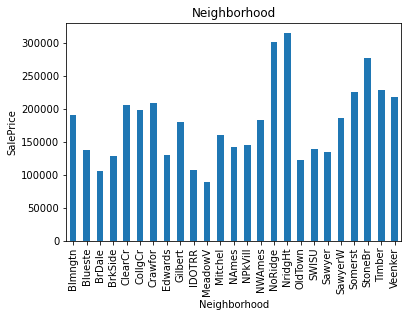

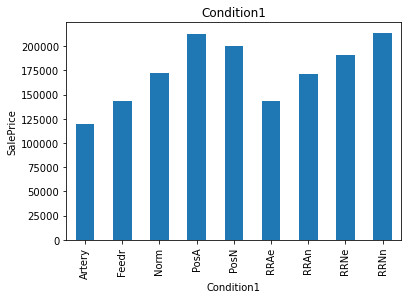

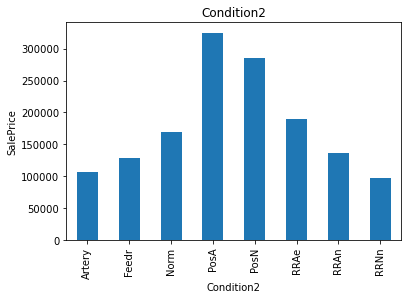

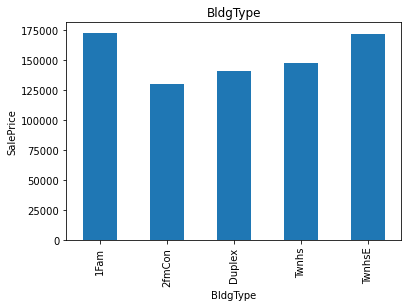

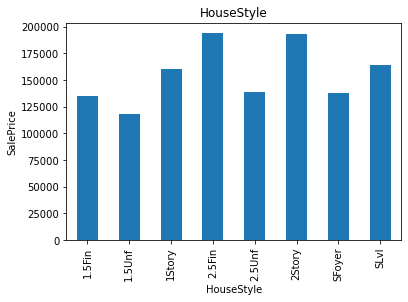

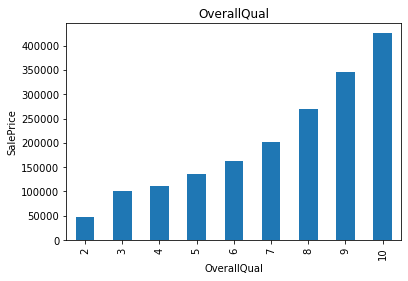

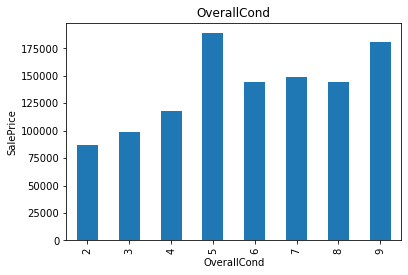

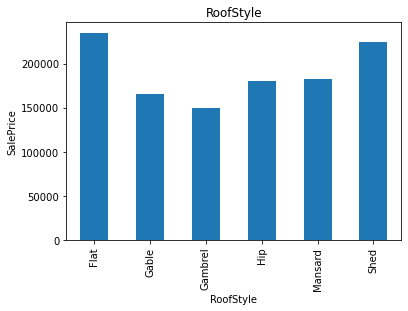

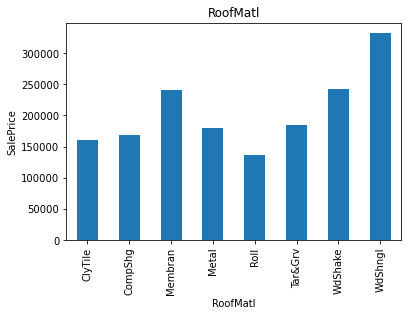

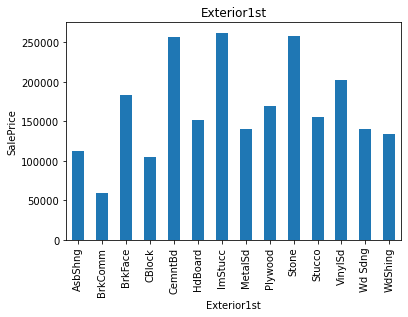

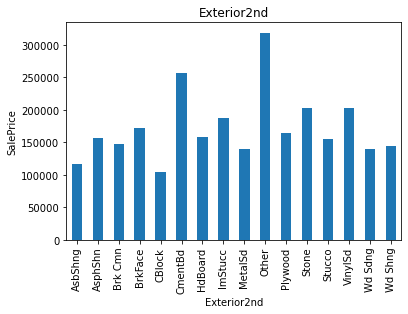

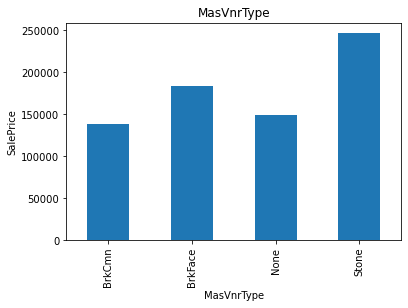

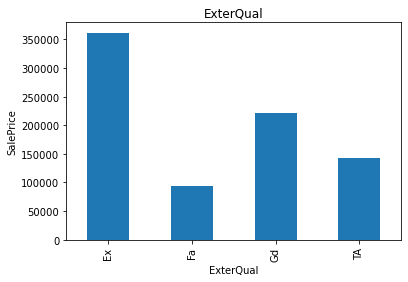

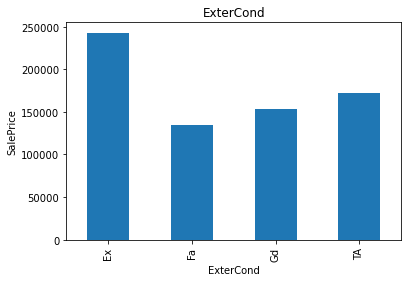

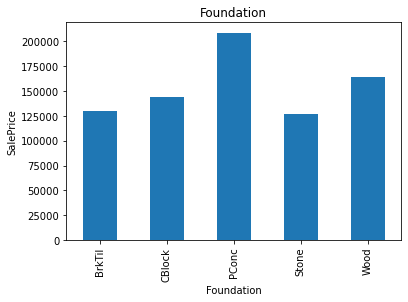

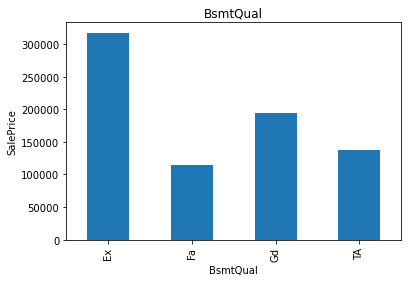

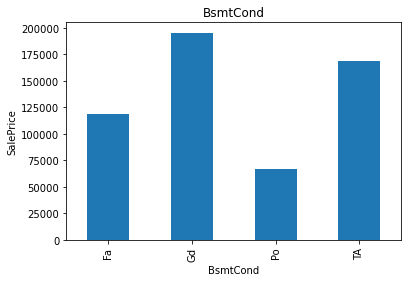

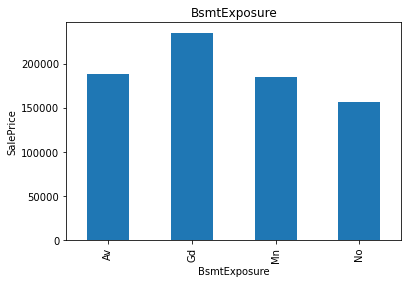

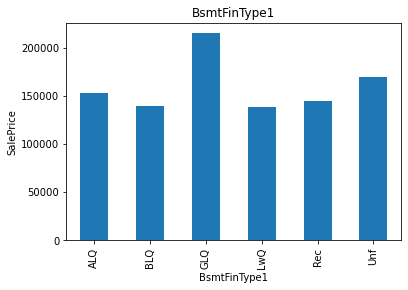

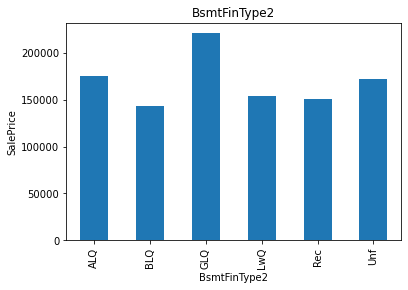

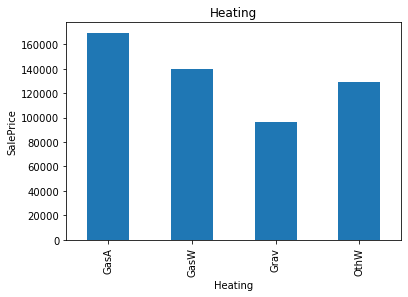

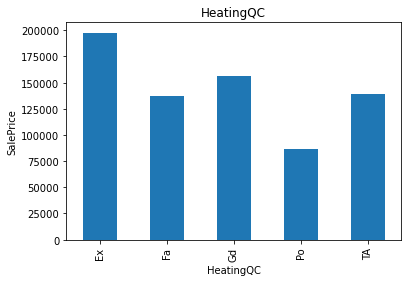

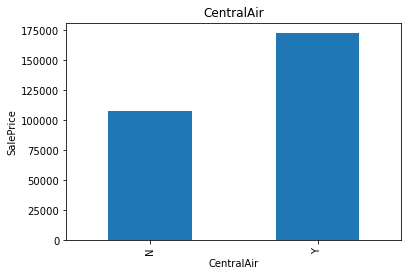

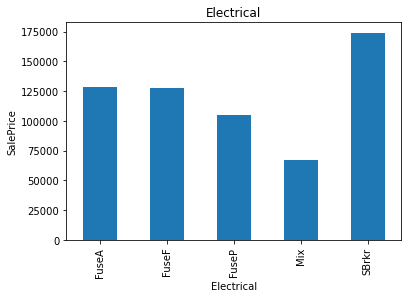

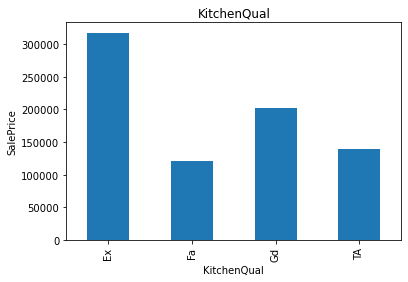

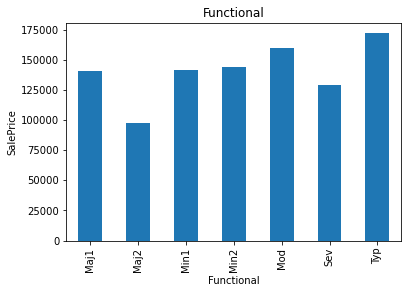

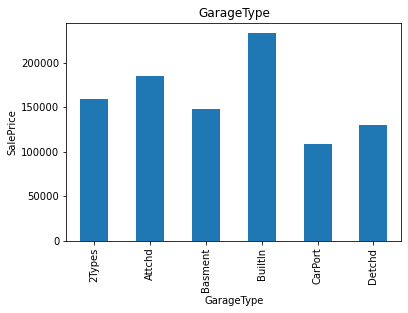

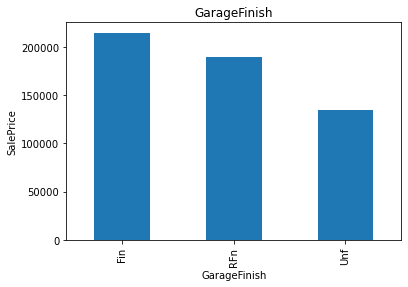

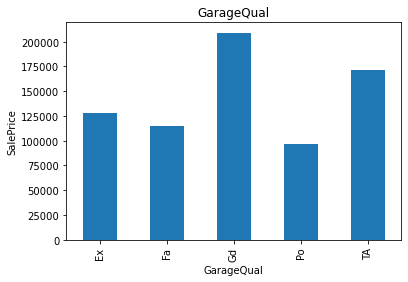

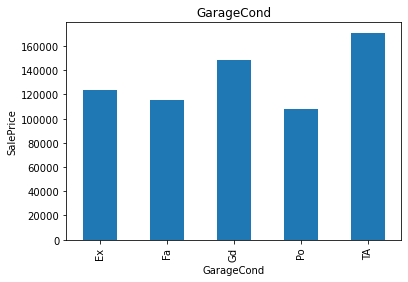

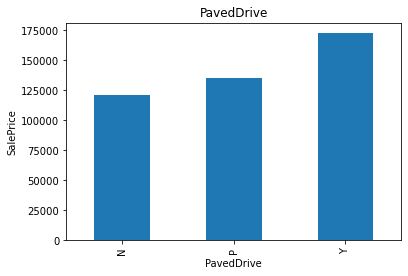

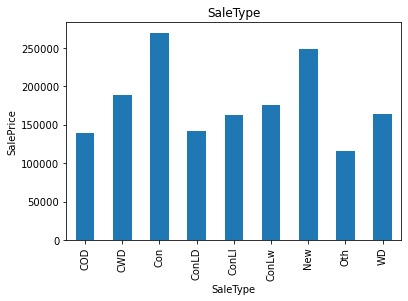

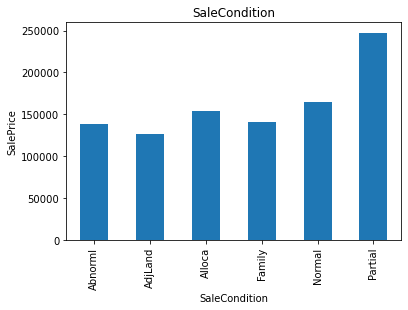

In [28]:
df_cat = Property.copy()
for col in cat_var:
    df_cat.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

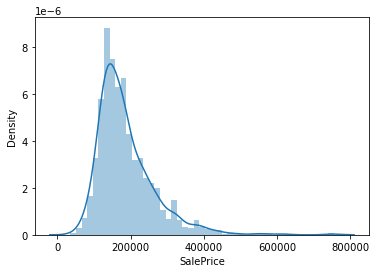

In [29]:
# Plotting Distribution of SalePrice
sb.distplot(Property['SalePrice'])
plt.show()

In [30]:
df = Property.copy()

### 3. Data Preparation
- Dummy Variables
- Splitting
- Scaling

In [31]:
print(cat_var)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [32]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [33]:
# List which does'nt require ENcoding
discard_dv = ['MSSubClass', 'OverallQual', 'OverallCond']
# List which req encoding
Dummy_list = [col for col in cat_var if col not in discard_dv]
len(Dummy_list)

38

#### Dummy Variable

In [34]:
df_dummy = pd.get_dummies(df[Dummy_list], drop_first= True)
df_dummy.head(3)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
# Removing col from df and concatenating with dummy variables
df.drop(Dummy_list, axis=1, inplace=True)

# Concat
df_price = pd.concat([df, df_dummy], axis=1)
df_price.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [36]:
df_price.shape

(1338, 228)

In [37]:
df_price =df_price.loc[:,~df_price.columns.duplicated()]
df_price.shape

(1338, 228)

In [38]:
# Outlier Treatment
import scipy
from scipy import stats
z = np.abs(stats.zscore(df_price[num_var]))

# Outliers Removed Records
select = df_price[num_var][(z < 3).all(axis = 1)]
df_price = df_price.loc[select.index]
df_price

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,134,1040,1040,0,0,1040,1,0,1,0,3,1,5,0,1965.0,1,384,0,0,0,0,0,0,0,2,2008,129500,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,78.0,9262,8,5,2008,2009,194.0,0,0,1573,1573,1578,0,0,1578,0,0,2,0,3,1,7,1,2008.0,3,840,0,36,0,0,0,0,0,5,2009,287090,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,0,547,1072,0,0,1072,1,0,1,0,2,1,5,0,2005.0,2,525,0,28,0,0,0,0,0,5,2006,145000,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,811,1221,1221,0,0,1221,1,0,2,0,2,1,6,0,2004.0,2,400,0,113,0,0,0,0,0,10,2009,185000,1,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,

In [39]:
y = df_price.loc[:, 'SalePrice']
X = df_price.loc[:, df_price.columns != 'SalePrice']

#### Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
# apllying fit transform on numerical features
scaler.fit(X)

MinMaxScaler()

#### Splitting

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
print(X_train.shape, y_train.shape)

(679, 227) (679,)


### Model Building

#### Linear Regression

Let's now try predicting prices, a dataset using linear regression.

In [44]:
from sklearn.linear_model import LinearRegression
# Instantiating object
lr = LinearRegression()
# Fitting 
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# Displaying Coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

-1393473.4359706957
[-4.15494573e+02  1.23854184e+01  1.57586932e+00  5.95685206e+03
  4.87337627e+03  3.12488565e+02  2.14067867e+02  8.78474154e-01
  8.83737654e+00  2.98411816e+01 -9.27338628e+00  2.94051731e+01
  2.70147375e+01  5.88324168e+01 -6.58276266e+01  2.00195278e+01
  2.85924617e+02 -1.09939720e-08 -2.32366000e+03 -2.75950829e+03
 -3.31579015e+02  1.92449079e-09 -1.00505533e+03  2.28129823e+03
 -2.53657955e+01  3.73707980e+03  8.68212929e+00  2.19160466e+01
  3.59595600e+01  3.06439744e+01 -3.95821131e+02  5.07312154e+01
 -2.05545803e-09  1.08762815e+00  3.30358158e+02  2.31229776e+02
  2.62835521e+04  1.23613235e+04  1.68814036e+04  1.59417992e+04
 -6.54252979e+04  9.89547399e+02 -1.10354624e+04  7.73628141e+02
  8.13446209e+03 -2.75916578e+04 -6.54770071e+03  7.27595761e-12
  6.35547171e+03 -8.90175608e+03 -1.50968790e+04 -6.52664661e+02
  2.71735132e+03  1.85961072e+03 -1.82690599e+04  9.20373759e+02
 -1.90501499e+04 -1.74414085e+04 -2.16744943e+04 -1.89174097e+03
 -3.2

Importing Metrics to check performance

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr = ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr  = ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr     = ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr     = ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr = ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr = ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr =  0.9451069256478055
r2_test_lr  =  0.9125386103595978
rss1_lr     =  141655906893.9903
rss2_lr     =  113053613388.34192
mse_train_lr =  208624310.59497833
mse_test_lr =  388500389.6506595


For now we will be focusing on Train and Test r2 score 

From the values above it seems to be a large difference between the r2 score of Train and Test set , whcih mean there is case of overfitting .

Let's now see how to handle the same

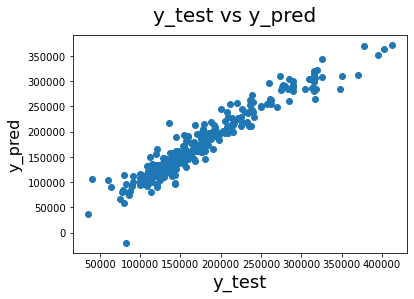

In [48]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Regularization

We know that for doing Ridge regression we need lamda as the hyperparameter for tuning , so getting lamda would be prority


In [49]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8,
                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                   20, 50, 100, 500, 1000, 2000]}

#### Ridge

In [50]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,
                                   2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [52]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=5)

In [53]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9367880523911899
0.9383888311389345
163123415307.5526
79639316199.53542
240240670.55604213
273674626.115242


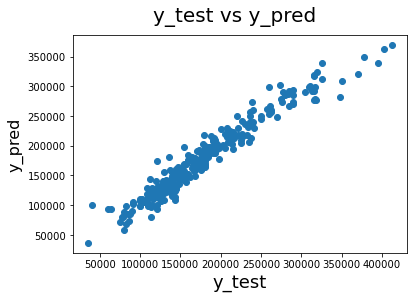

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### Lasso

In [55]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   18.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,
                                   2000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [57]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(Lasso(alpha=100, random_state=0))
sfm.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=100, random_state=0))

In [58]:
sfm.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True, False, False, False, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False,

In [59]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [60]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9295751464593701
0.9378084902323165
181736887829.7402
80389471631.09189
267653737.5990283
276252479.8319309


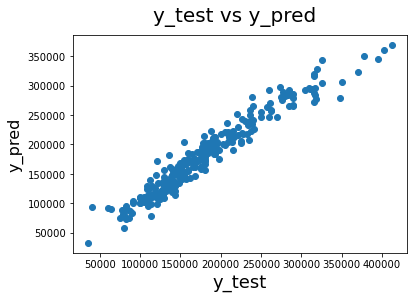

In [61]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [62]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.451069e-01,9.367881e-01,9.295751e-01
1,R2 Score (Test),9.125386e-01,9.383888e-01,9.378085e-01
2,RSS (Train),1.416559e+11,1.631234e+11,1.817369e+11
3,RSS (Test),1.130536e+11,7.963932e+10,8.038947e+10
4,MSE (Train),1.444383e+04,1.549970e+04,1.636013e+04
5,MSE (Test),1.971041e+04,1.654311e+04,1.662084e+04


We see that the difference etween r2 scores of test and train is less for Ridge 

##### Creating dataframe for coefficients

In [63]:
coef = pd.DataFrame(index=X.columns)
coef.rows = X.columns
coef['Linear'] = lr.coef_
coef['Ridge'] = ridge.coef_
coef['Lasso'] = lasso.coef_
c = coef.transpose()
c

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Linear,-415.494573,12.385418,1.575869,5956.852058,4873.376272,312.488565,214.067867,0.878474,8.837377,29.841182,-9.273386,29.405173,27.014737,58.832417,-65.827627,20.019528,285.924617,-1.099397e-08,-2323.660005,-2759.508293,-331.579015,1.924491e-09,-1005.055332,2281.298231,-25.365795,3737.079803,8.682129,21.916047,35.959560,30.643974,-395.821131,50.731215,-2.055458e-09,1.087628,330.358158,231.229776,26283.552062,12361.323455,16881.403646,15941.799222,-65425.297861,989.547399,-11035.462367,773.628141,8134.462090,-27591.657799,-6547.700711,7.275958e-12,6355.471712,-8901.756082,...,5557.308632,7.275958e-12,1300.689940,-1576.681849,1.455192e-11,73.306742,-2149.196064,-5536.582557,-4328.030024,128.350441,4035.321278,-14143.482337,-23150.706991,-20595.543431,128.350441,251.795596,-5211.803783,-20407.682621,0.0,13478.649918,-2886.794859,6350.581293,-5202.215008,0.0,1738.428574,1893.327474,1480.284477,6402.460392,10088.699887,-26769.978922,10278.818644,-11226.815564,4211.802605,12881.868792,-5866.855833,-11617.288017,5240.694442,48796.178365,9559.780668,-8238.247623,-24503.493666,0.0,-26377.061462,22993.500996,218.079084,52785.235323,-38802.040915,-90.904034,4755.053296,37905.462084
Ridge,-106.877662,39.959903,1.396926,8246.494960,4899.653754,369.716415,199.637888,-0.290757,11.698956,20.519713,-6.440806,25.777862,37.663974,58.478227,-87.889071,8.253135,1258.138038,0.000000e+00,-709.136522,-2100.759932,-1757.544307,0.000000e+00,290.608049,3026.820723,-52.072116,2991.728888,11.037748,21.161322,34.926458,20.237532,-360.024034,58.215326,0.000000e+00,-1.322445,303.839879,83.812582,6359.559714,1459.613718,2554.428390,-1979.998565,6124.932542,-804.553105,-4651.369765,-162.105608,9323.277896,-7594.901631,-1247.056076,0.000000e+00,6218.555938,-4848.753881,...,-132.038018,0.000000e+00,2299.341829,-1489.951080,0.000000e+00,-2006.814919,359.496166,1859.391455,-94.585619,-718.224369,4037.228426,-6671.973294,-17519.105613,-13836.524627,-718.224369,-637.038955,-4485.117316,-6181.234572,0.0,12164.924852,-1176.459926,-485.288666,48.946827,0.0,1612.801764,1491.816327,1650.540588,-532.418750,1258.716517,-1838.909862,1112.612096,-2207.680878,2108.899680,265.982889,-167.201691,-1129.067828,5643.668878,11104.192189,1731.167199,1780.655471,-6456.105071,0.0,1523.745482,3657.882373,-2999.738672,4618.854003,-10172.052634,132.213401,3993.491634,8246.770740
Lasso,-95.995218,45.773198,1.248832,8445.261422,5065.264928,412.212278,176.824520,1.582665,27.756331,23.196840,9.014997,10.024318,33.732704,45.389110,-84.133779,13.204584,981.373903,0.000000e+00,-0.000000,-515.411033,-1301.703850,0.000000e+00,511.810022,2676.859618,-

If we see then only 118 columns are retained after performing Lasso Regression

In [64]:
Lasso_features = X_train.columns[sfm.get_support()]
len(Lasso_features)

88

Let's sort the dataframe of coefficients by Lasso , the top 10 predictors are thus

In [65]:
coef.sort_values(by=['Lasso'], ascending=False).head(10)

,Linear,Ridge,Lasso
Neighborhood_StoneBr,23269.937082,20614.187691,29634.156475
Neighborhood_Crawfor,-1891.740970,15016.609240,21680.576923
Neighborhood_NridgHt,3845.883049,12592.333784,16193.622858
Functional_Typ,13478.649918,12164.924852,13945.873772
Exterior1st_BrkFace,-5620.677654,10811.854740,13891.401112
BsmtExposure_Gd,14545.298009,10325.282065,10059.795050
SaleCondition_Partial,37905.462084,8246.770740,8544.551634
LandContour_HLS,8134.462090,9323.277896,8542.775244
OverallQual,5956.852058,8246.494960,8445.261422
Condition1_Norm,11957.557715,7714.174924,6840.527140
